# INFLUENZA Dashboard

## Load essential tools required from Jupyter Notebook

In [ ]:
from IPython.display import clear_output
import ipywidgets as wdg
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json
# an iPython  "magic" that enables the embedding of matplotlib output
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

## Download all data for Influenza testing posibility, hospital admissions and ICUHDU admissions

In [4]:
class APIwrapper:
    # class variables shared among all instances
    _access_point="https://api.ukhsa-dashboard.data.gov.uk"
    _last_access=0.0 # time of last api access
    
    def __init__(self, theme, sub_theme, topic, geography_type, geography, metric):
        """ Init the APIwrapper object, constructing the endpoint from the structure
        parameters """
        # build the path with all the required structure parameters
        url_path=(f"/themes/{theme}/sub_themes/{sub_theme}/topics/{topic}/geography_types/" +
                  f"{geography_type}/geographies/{geography}/metrics/{metric}")
        # our starting API endpoint
        self._start_url=APIwrapper._access_point+url_path
        self._filters=None
        self._page_size=-1
        # will contain the number of items
        self.count=None

    def get_page(self, filters={}, page_size=5):
        """ Access the API and download the next page of data. Sets the count
        attribute to the total number of items available for this query. Changing
        filters or page_size will cause get_page to restart from page 1. Rate
        limited to three request per second. The page_size parameter sets the number
        of data points in one response page (maximum 365); use the default value 
        for debugging your structure and filters, increase when you start looping 
        over all pages. """
        # Check page size is within range
        if page_size>365:
            raise ValueError("Max supported page size is 365")
        # restart from first page if page or filters have changed
        if filters!=self._filters or page_size!=self._page_size:
            self._filters=filters
            self._page_size=page_size
            self._next_url=self._start_url
        # signal the end of data condition
        if self._next_url==None: 
            return [] # we already fetched the last page
        # simple rate limiting to avoid bans
        curr_time=time.time() # Unix time: number of seconds since the Epoch
        deltat=curr_time-APIwrapper._last_access
        if deltat<0.33: # max 3 requests/second
            time.sleep(0.33-deltat)
        APIwrapper._last_access=curr_time
        # build parameter dictionary by removing all the None
        # values from filters and adding page_size
        parameters={x: y for x, y in filters.items() if y!=None}
        parameters['page_size']=page_size
        # the page parameter is already included in _next_url.
        # This is the API access. Response is a dictionary with various keys.
        # the .json() method decodes the response into Python object (dictionaries,
        # lists; 'null' values are translated as None).
        response = requests.get(self._next_url, params=parameters).json()
        # update url so we'll fetch the next page
        self._next_url=response['next']
        self.count=response['count']
        # data are in the nested 'results' list
        return response['results'] 

### All Influenza Positive Test in 2024

In [5]:


filters={"stratum" : None, # Smallest subgroup a metric can be broken down into e.g. ethnicity, testing pillar
         "age": None, # Smallest subgroup a metric can be broken down into e.g. 15_44 for the age group of 15-44 years
         "sex": None, #  Patient gender e.g. 'm' for Male, 'f' for Female or 'all' for all genders
         "year": 2024, #  Epi year of the metrics value (important for annual metrics) e.g. 2020
         "month": None, # Epi month of the metric value (important for monthly metrics) e.g. 12
         "epiweek" :None, # Epi week of the metric value (important for weekly metrics) e.g. 30
         "date" : None, # The date which this metric value was recorded in the format YYYY-MM-DD e.g. 2020-07-20
         "in_reporting_delay_period": None # Boolean indicating whether the data point is considered to be subject to retrospective updates
        }


structure={"theme": "infectious_disease", 
           "sub_theme": "respiratory",
           "topic": "Influenza",
           "geography_type": "Nation", 
           "geography": "England"}
structure["metric"]="influenza_testing_positivityByWeek"

api=APIwrapper(**structure)
influenzaTest2024=[]
# page=1
while True:
    data=api.get_page(filters,page_size = 300)
    # print(f"Pages retrieved: {page}")
    if data==[]:
        break
    influenzaTest2024.extend(data)
    # page+=1
import json
with open("influenzaTest2024.json", "wt") as OUTF:
    json.dump(influenzaTest2024, OUTF)
print('Data for Influenza testing posibility has been saved as "influenzaTest2024.json"')

### All Influenza hospital admission in 2024

In [6]:


filters={"stratum" : None, # Smallest subgroup a metric can be broken down into e.g. ethnicity, testing pillar
         "age": None, # Smallest subgroup a metric can be broken down into e.g. 15_44 for the age group of 15-44 years
         "sex": None, #  Patient gender e.g. 'm' for Male, 'f' for Female or 'all' for all genders
         "year": 2024, #  Epi year of the metrics value (important for annual metrics) e.g. 2020
         "month": None, # Epi month of the metric value (important for monthly metrics) e.g. 12
         "epiweek" :None, # Epi week of the metric value (important for weekly metrics) e.g. 30
         "date" : None, # The date which this metric value was recorded in the format YYYY-MM-DD e.g. 2020-07-20
         "in_reporting_delay_period": None # Boolean indicating whether the data point is considered to be subject to retrospective updates
        }


structure={"theme": "infectious_disease", 
           "sub_theme": "respiratory",
           "topic": "Influenza",
           "geography_type": "Nation", 
           "geography": "England"}
structure["metric"]="influenza_healthcare_hospitalAdmissionRateByWeek"

api=APIwrapper(**structure)
influenzaHospitalAdmission2024=[]
# page=1
while True:
    data=api.get_page(filters,page_size = 300)
    # print(f"Pages retrieved: {page}")
    if data==[]:
        break
    influenzaHospitalAdmission2024.extend(data)
    # page+=1
import json
with open("influenzaHospitalAdmission2024.json", "wt") as OUTF:
    json.dump(influenzaHospitalAdmission2024, OUTF)

print('Data for Influenza hospital admissions has been saved as "influenzaHospitalAdmission2024.json"')

### All Influenza ICUHDU admission in 2024

In [7]:
filters={"stratum" : None, # Smallest subgroup a metric can be broken down into e.g. ethnicity, testing pillar
         "age": None, # Smallest subgroup a metric can be broken down into e.g. 15_44 for the age group of 15-44 years
         "sex": None, #  Patient gender e.g. 'm' for Male, 'f' for Female or 'all' for all genders
         "year": 2024, #  Epi year of the metrics value (important for annual metrics) e.g. 2020
         "month": None, # Epi month of the metric value (important for monthly metrics) e.g. 12
         "epiweek" :None, # Epi week of the metric value (important for weekly metrics) e.g. 30
         "date" : None, # The date which this metric value was recorded in the format YYYY-MM-DD e.g. 2020-07-20
         "in_reporting_delay_period": None # Boolean indicating whether the data point is considered to be subject to retrospective updates
        }


structure={"theme": "infectious_disease", 
           "sub_theme": "respiratory",
           "topic": "Influenza",
           "geography_type": "Nation", 
           "geography": "England"}
structure["metric"]="influenza_healthcare_ICUHDUadmissionRateByWeek"

api=APIwrapper(**structure)
influenzaICUHDUAdmission2024=[]
# page=1
while True:
    data=api.get_page(filters,page_size = 300)
    # print(f"Pages retrieved: {page}")
    if data==[]:
        break
    influenzaICUHDUAdmission2024.extend(data)
    # page+=1
import json
with open("influenzaICUHDUAdmission2024.json", "wt") as OUTF:
    json.dump(influenzaICUHDUAdmission2024, OUTF)
print('Data for Influenza ICUHDU admissions has been saved as "influenzaICUHDUAdmission2024.json"')

## Creat time series data

In [10]:
with open("influenzaTest2024.json", "rt") as INFILE:
    test=json.load(INFILE)
with open("influenzaHospitalAdmission2024.json", "rt") as INFILE:
    hospitalAdmission=json.load(INFILE)
with open("influenzaICUHDUAdmission2024.json", "rt") as INFILE:
    ICUAdmission=json.load(INFILE)

In [11]:
data={}
for dataset in [test, hospitalAdmission, ICUAdmission]:
    for entry in dataset:
        date=entry['date']
        metric=entry['metric']
        value=entry['metric_value']
        if date not in data:
            data[date]={}
        data[date][metric]=value

In [12]:
dates=list(data.keys())
dates.sort()

In [24]:
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
print('The time frame will be:')
print (startdate, ' to ', enddate)
index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf=pd.DataFrame(index=index, columns=['Testing_Posibility', 'Hospital_Adminssion', 'ICUHDU_Admission'])


The time frame will be:
2024-01-01 00:00:00  to  2024-10-07 00:00:00


In [26]:
metrics ={'Testing_Posibility': 'influenza_testing_positivityByWeek',
          'Hospital_Adminssion': 'influenza_healthcare_hospitalAdmissionRateByWeek',
          'ICUHDU_Admission': 'influenza_healthcare_ICUHDUadmissionRateByWeek'}

for date, entry in data.items(): # each entry is a dictionary with cases, admissions and deaths
    pd_date=parse_date(date) # convert to Pandas format
    for column in ['Testing_Posibility', 'Hospital_Adminssion', 'ICUHDU_Admission']: 
        metric_name=metrics[column]
        # do not assume all values are there for every date - if a value is not available, insert a 0.0
        value= entry.get(metric_name, 0.0)
        # this is the way you access a specific location in the dataframe - use .loc
        # and put index,column in a single set of [ ]
        timeseriesdf.loc[pd_date, column]=value
            
# # fill in any remaining "holes" due to missing dates
timeseriesdf.fillna(0.0, inplace=True)
print('The table with data for time frame:\n')
print(timeseriesdf)


The table with data for time frame:

            Testing_Posibility  Hospital_Adminssion  ICUHDU_Admission
2024-01-01                4.23                 4.86              0.12
2024-01-02                0.00                 0.00              0.00
2024-01-03                0.00                 0.00              0.00
2024-01-04                0.00                 0.00              0.00
2024-01-05                0.00                 0.00              0.00
...                        ...                  ...               ...
2024-10-03                0.00                 0.00              0.00
2024-10-04                0.00                 0.00              0.00
2024-10-05                0.00                 0.00              0.00
2024-10-06                0.00                 0.00              0.00
2024-10-07                1.88                 0.54              0.02

[281 rows x 3 columns]


## Plotting the data

### Lineage

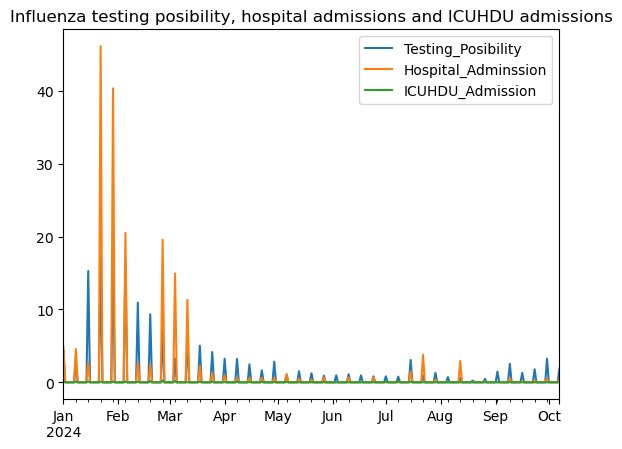

In [15]:
ax=timeseriesdf.plot() # easy peasy...
ax.set_title('Influenza testing posibility, hospital admissions and ICUHDU admissions');

### Log scale

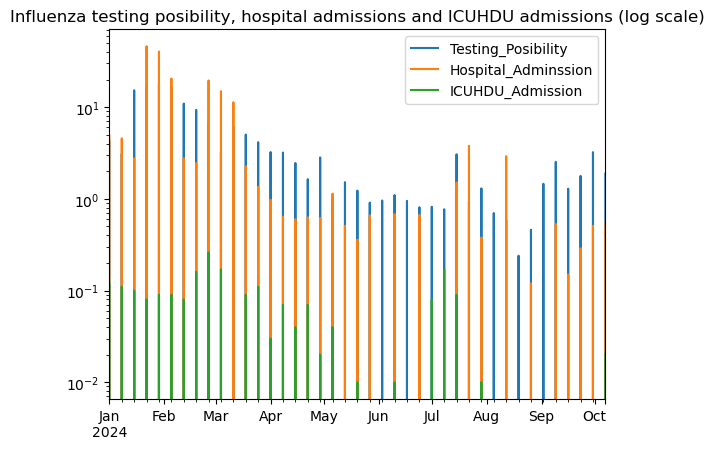

In [16]:
ax=timeseriesdf.plot(logy=True) # ...lemon squeezy
ax.set_title('Influenza testing posibility, hospital admissions and ICUHDU admissions (log scale)');

### Getting the data into pickle

In [17]:
timeseriesdf.to_pickle("influenzaTimeseriesdf.pkl")

## Adding interactive control

In [19]:
timeseriesdf=pd.read_pickle("influenzaTimeseriesdf.pkl")

In [21]:
series=wdg.SelectMultiple(
    options=['Testing_Posibility', 'Hospital_Adminssion', 'ICUHDU_Admission'],
    value=['Testing_Posibility', 'Hospital_Adminssion', 'ICUHDU_Admission'],
    rows=3,
    description='Stats:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
#   value='pineapple', # Defaults to 'pineapple'
#   layout={'width': 'max-content'}, # If the items' names are long
    description='Scale:',
    disabled=False
)

# try replacing HBox with a VBox
controls=wdg.HBox([series, scale])

def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        timeseriesdf[list(gcols)].plot(logy=logscale)
        plt.show() # important - graphs won't update if this is missing 
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

# keep calling timeseries_graph(gcols=value_of_series, gscale=value_of_scale); 
# capture output in widget graph   
graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

Output()

**Author and License:** Based on UK Government [data](https://ukhsa-dashboard.data.gov.uk/) published by the [UK Health Security Agency](https://www.gov.uk/government/organisations/uk-health-security-agency) and on the [DIY Disease Tracking Dashboard Kit](https://github.com/fsmeraldi/diy-covid19dash) by Fabrizio Smeraldi. Released under the [GNU GPLv3.0 or later](https://www.gnu.org/licenses/).